**Dividing Data Into Training and Testing**

<ipython-input-43-bed63c9337a4>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'Log_{col}'] = np.log(train_data[col]+1)
<ipython-input-43-bed63c9337a4>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'Log_{col}'] = np.log(test_data[col]+1)
<ipython-input-43-bed63c9337a4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

MAE: 3089.75
Mean Absolute Percentage Error (MAPE): 7.53%
Model for Value:
R-squared: 0.9388
Adjusted R-squared: 0.9362
RMSE: 5063.8813

AIC is: -2.4402926240347114
BIC is: 0.0759004520082529


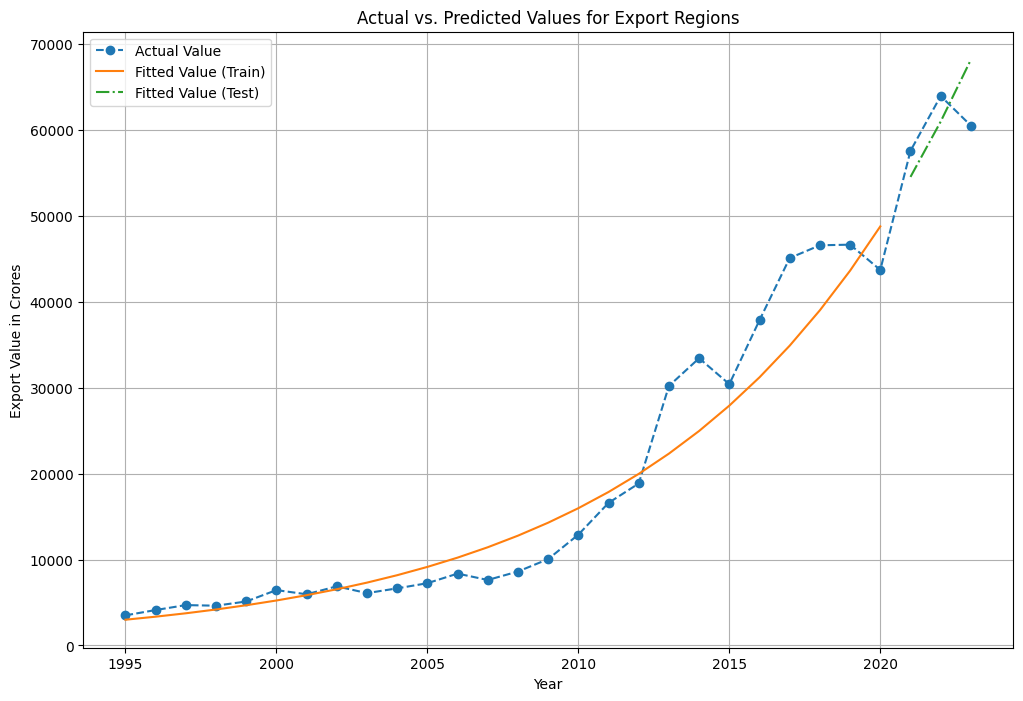

      Forecast_Value
Item                
2022    60992.729922
2023    68195.505984


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
years = np.arange(1995, 2024)
data={
    'Item':[0]*29,
    'Value':[3501.107,4121.364,4697.475,4626.863,5116.672,6443.890,5957.050,6881.310,6091.950,6646.690,7245.297,8363.526,7620.918,8607.942,10048.530,12901.466,16597.227,18856.256,30213.258,33441.606,30420.828,37870.904,45106.891,46589.374,46662.848,43720.981,57586.479,63969.142,60523.891]
}

data = pd.DataFrame(data)
data['Item'] = years
data['Item'] = data['Item'].astype(int)

train_size = 26
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

forecast_years = np.arange(2022,2024)
forecast_data = pd.DataFrame({'Item': forecast_years})

for col in ['Value']:

    train_data[f'Log_{col}'] = np.log(train_data[col]+1)
    test_data[f'Log_{col}'] = np.log(test_data[col]+1)
    X_train = sm.add_constant(train_data['Item'])
    y_train = train_data[f'Log_{col}']
    model = sm.OLS(y_train, X_train).fit()

    train_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(train_data['Item'])))-1
    test_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(test_data['Item'])) )-1
    r_squared = model.rsquared
    n=len(train_data)
    p=1
    rmse = np.sqrt(mean_squared_error(test_data[col], test_data[f'Fitted_{col}']))
    adjusted_rsquared=1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
    from sklearn.metrics import mean_absolute_percentage_error
    mape = mean_absolute_percentage_error(test_data[col], test_data[f'Fitted_{col}']) * 100
    mae=mean_absolute_error(train_data[col], train_data[f'Fitted_{col}'])
    print(f"MAE: {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f'Model for {col}:')
    print(f'R-squared: {r_squared:.4f}')
    print(f'Adjusted R-squared: {adjusted_rsquared:.4f}')
    print(f'RMSE: {rmse:.4f}\n')
    print("AIC is:",model.aic)
    print("BIC is:",model.bic)
    forecast_data[f'Forecast_{col}'] = model.predict(sm.add_constant(forecast_data['Item']))
    forecast_data[f'Forecast_{col}'] = np.exp(forecast_data[f'Forecast_{col}'])-1

plt.figure(figsize=(12, 8))

for col in ['Value']:
    plt.plot(data['Item'], data[col], label=f'Actual {col}', marker='o', linestyle='--')
    plt.plot(train_data['Item'], train_data[f'Fitted_{col}'], label=f'Fitted {col} (Train)', linestyle='-')
    plt.plot(test_data['Item'], test_data[f'Fitted_{col}'], label=f'Fitted {col} (Test)', linestyle='-.')

plt.title('Actual vs. Predicted Values for Export Regions')
plt.xlabel('Year')
plt.ylabel('Export Value in Crores')
plt.legend()
plt.grid(True)
plt.show()
forecast_data.set_index('Item', inplace=True)
print(forecast_data)



**Using the Entire Data for Training and Testing**

<ipython-input-44-3c77c60c2492>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'Log_{col}'] = np.log(train_data[col]+1)
<ipython-input-44-3c77c60c2492>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(train_data['Item'])))-1


MAE: 3253.83
MAPE: 18.04%
Model for Value:
R-squared: 0.9543
Adjusted R-squared: 0.9526
RMSE: 4304.0384

AIC is: -5.881640746749689
BIC is: -3.1470490867767404


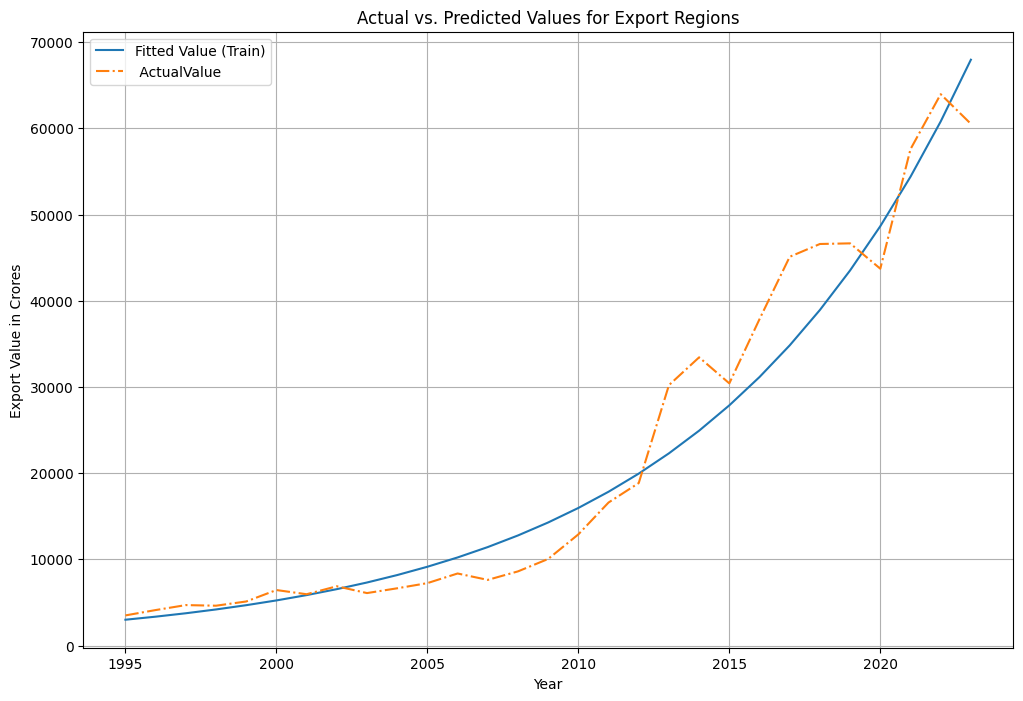

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pickle
years = np.arange(1995, 2024)
data={
    'Item':[0]*29,
    'Value':[3501.107,4121.364,4697.475,4626.863,5116.672,6443.890,5957.050,6881.310,6091.950,6646.690,7245.297,8363.526,7620.918,8607.942,10048.530,12901.466,16597.227,18856.256,30213.258,33441.606,30420.828,37870.904,45106.891,46589.374,46662.848,43720.981,57586.479,63969.142,60523.891]
}

data = pd.DataFrame(data)
data['Item'] = years
data['Item'] = data['Item'].astype(int)

train_size = 29
train_data = data.iloc[:train_size]

for col in ['Value']:

    train_data[f'Log_{col}'] = np.log(train_data[col]+1)
    X_train = sm.add_constant(train_data['Item'])
    y_train = train_data[f'Log_{col}']
    model = sm.OLS(y_train, X_train).fit()

    train_data[f'Fitted_{col}'] = np.exp(model.predict(sm.add_constant(train_data['Item'])))-1
    r_squared = model.rsquared
    n=len(train_data)
    p=1
    rmse = np.sqrt(mean_squared_error(train_data[col], train_data[f'Fitted_{col}']))
    adjusted_rsquared=1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import mean_absolute_error
    mape = mean_absolute_percentage_error(train_data[col], train_data[f'Fitted_{col}']) * 100
    mae=mean_absolute_error(train_data[col], train_data[f'Fitted_{col}'])
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f'Model for {col}:')
    print(f'R-squared: {r_squared:.4f}')
    print(f'Adjusted R-squared: {adjusted_rsquared:.4f}')
    print(f'RMSE: {rmse:.4f}\n')
    print("AIC is:",model.aic)
    print("BIC is:",model.bic)


plt.figure(figsize=(12, 8))

for col in ['Value']:
    plt.plot(train_data['Item'], train_data[f'Fitted_{col}'], label=f'Fitted {col} (Train)', linestyle='-')
    plt.plot(train_data['Item'], train_data[f'{col}'], label=f' Actual{col}', linestyle='-.')

plt.title('Actual vs. Predicted Values for Export Regions')
plt.xlabel('Year')
plt.ylabel('Export Value in Crores')
plt.legend()
plt.grid(True)
plt.show()
with open('linear_regression_model.pkl', 'wb') as file:
  pickle.dump(model, file)


**Function to be used for Deployment**

In [45]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
def prediction(x):
  if(x<2026 or x>2030):
    return " Please stick to the range"
  with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
  forecast_data = pd.DataFrame({'Item': np.arange(2024, x+1)})
  forecast_const = sm.add_constant(forecast_data['Item'])
  forecast_data['Value'] = np.exp(loaded_model.predict(forecast_const)) - 1
  print("Predictions using loaded model in Crores:")
  print(forecast_data)
  years = np.arange(1995, 2024)
  data = pd.DataFrame({
     'Item': years,
     'Value': [3501.107,4121.364,4697.475,4626.863,5116.672,6443.890,5957.050,6881.310,6091.950,6646.690,7245.297,8363.526,7620.918,8607.942,10048.530,12901.466,16597.227,18856.256,30213.258,33441.606,30420.828,37870.904,45106.891,46589.374,46662.848,43720.981,57586.479,63969.142,60523.891]})
  plt.plot(data['Item'],data['Value'],marker="o",linestyle="--",label="Trend from 1995 to 2023")
  plt.plot(forecast_data['Item'],forecast_data['Value'],linestyle="-",label="Forecast value from 2024 till {}".format(x))
  plt.title('Actual vs. Predicted Values for Export Regions')
  plt.xlim(1995,2030)
  plt.xlabel('Year')
  plt.ylabel('Export Value in Crores')
  plt.legend()
  plt.show()

Enter a year in the range 2026-2030:2027
Predictions using loaded model in Crores:
   Item          Value
0  2024   75977.036870
1  2025   84932.517219
2  2026   94943.574043
3  2027  106134.627434


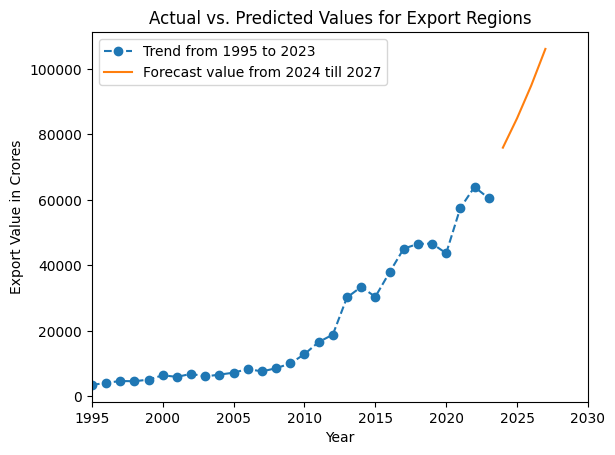

In [46]:
 x=int(input("Enter a year in the range 2026-2030:"))
 prediction(x)